In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df=df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
#loading the data
df.shape

(300153, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
#checking missing values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

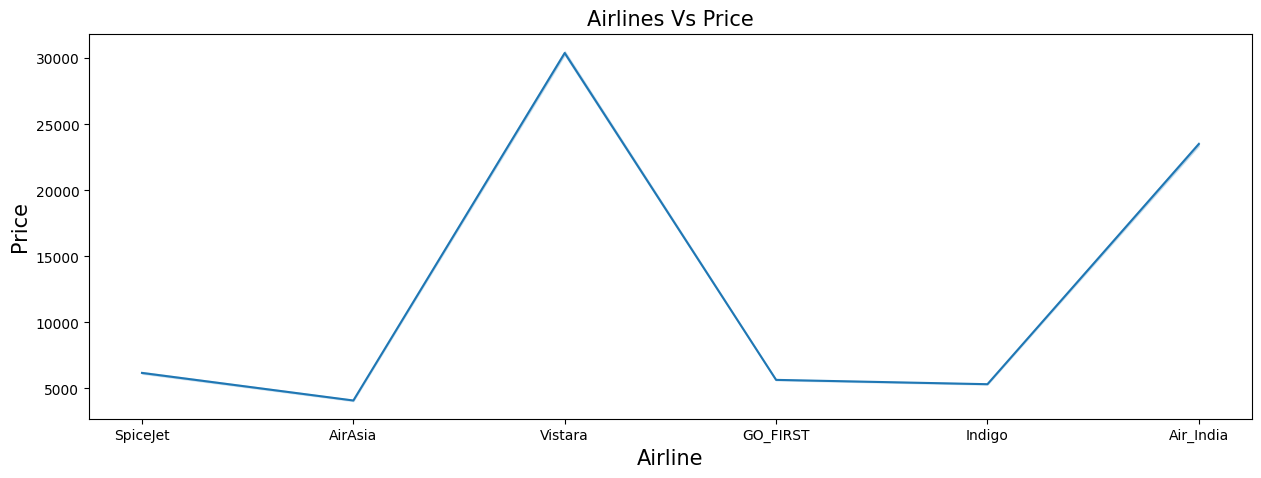

In [13]:
#data visualization
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

#from the plot:price is highest for vistara airlines

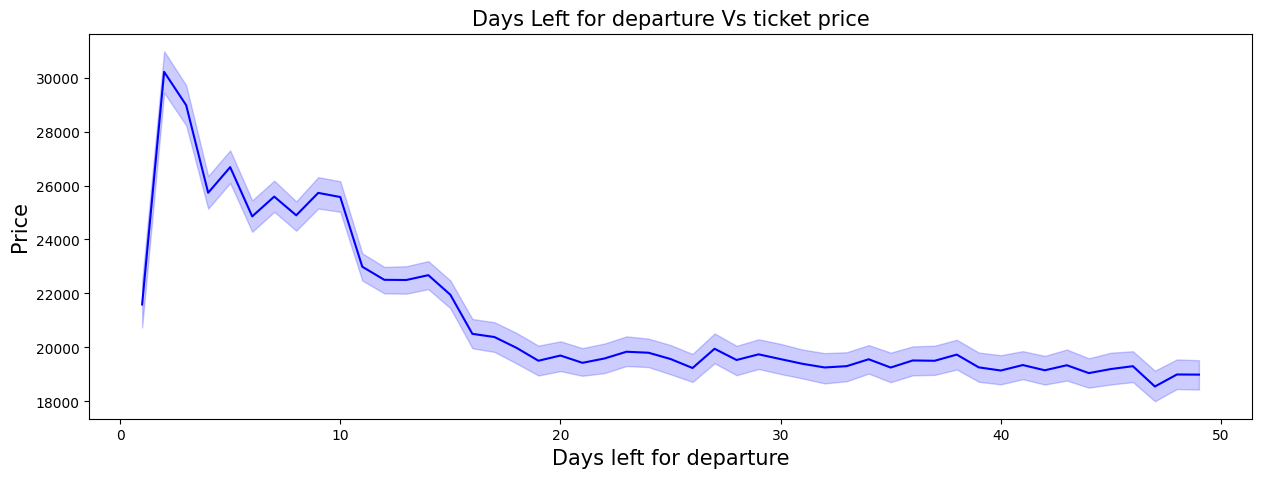

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left for departure Vs ticket price',fontsize=15)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

#from the plot:price is highest when the days left for departure are minimum

<Axes: xlabel='airline', ylabel='price'>

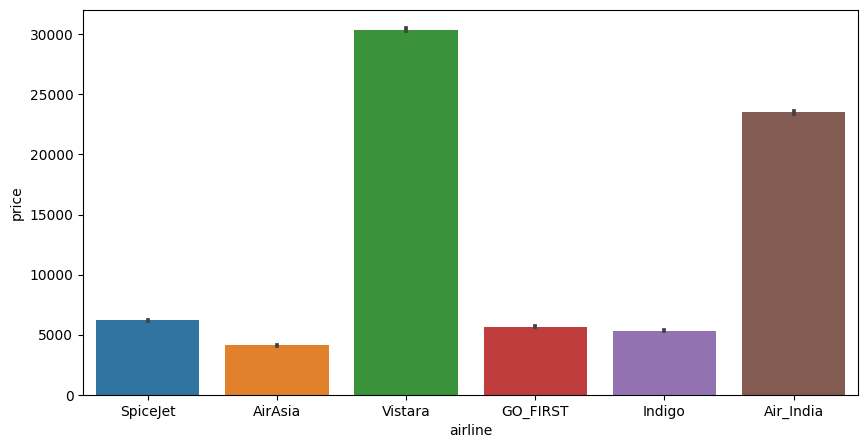

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

#from the plot: vistara airlines prices are the highest

<Axes: xlabel='class', ylabel='price'>

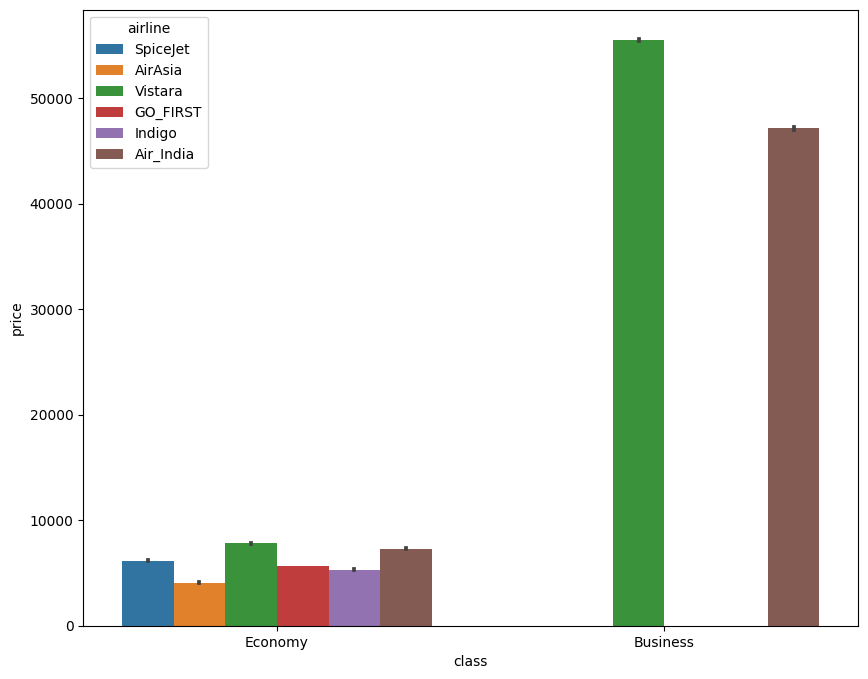

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x='class',y='price',data=df,hue='airline')

#from the plot: buissness class of vistara has the highest price

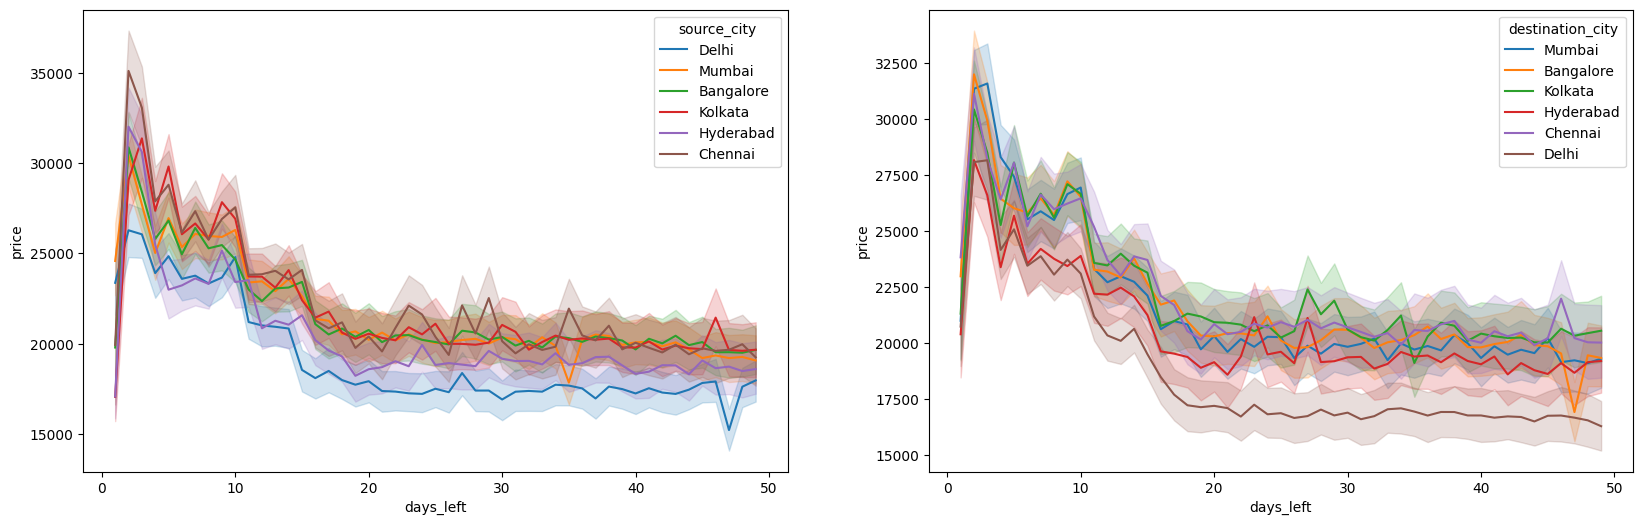

In [17]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

#from the plot: prices highest for Chennai as source city and Banglore as destination city when days left are minimum

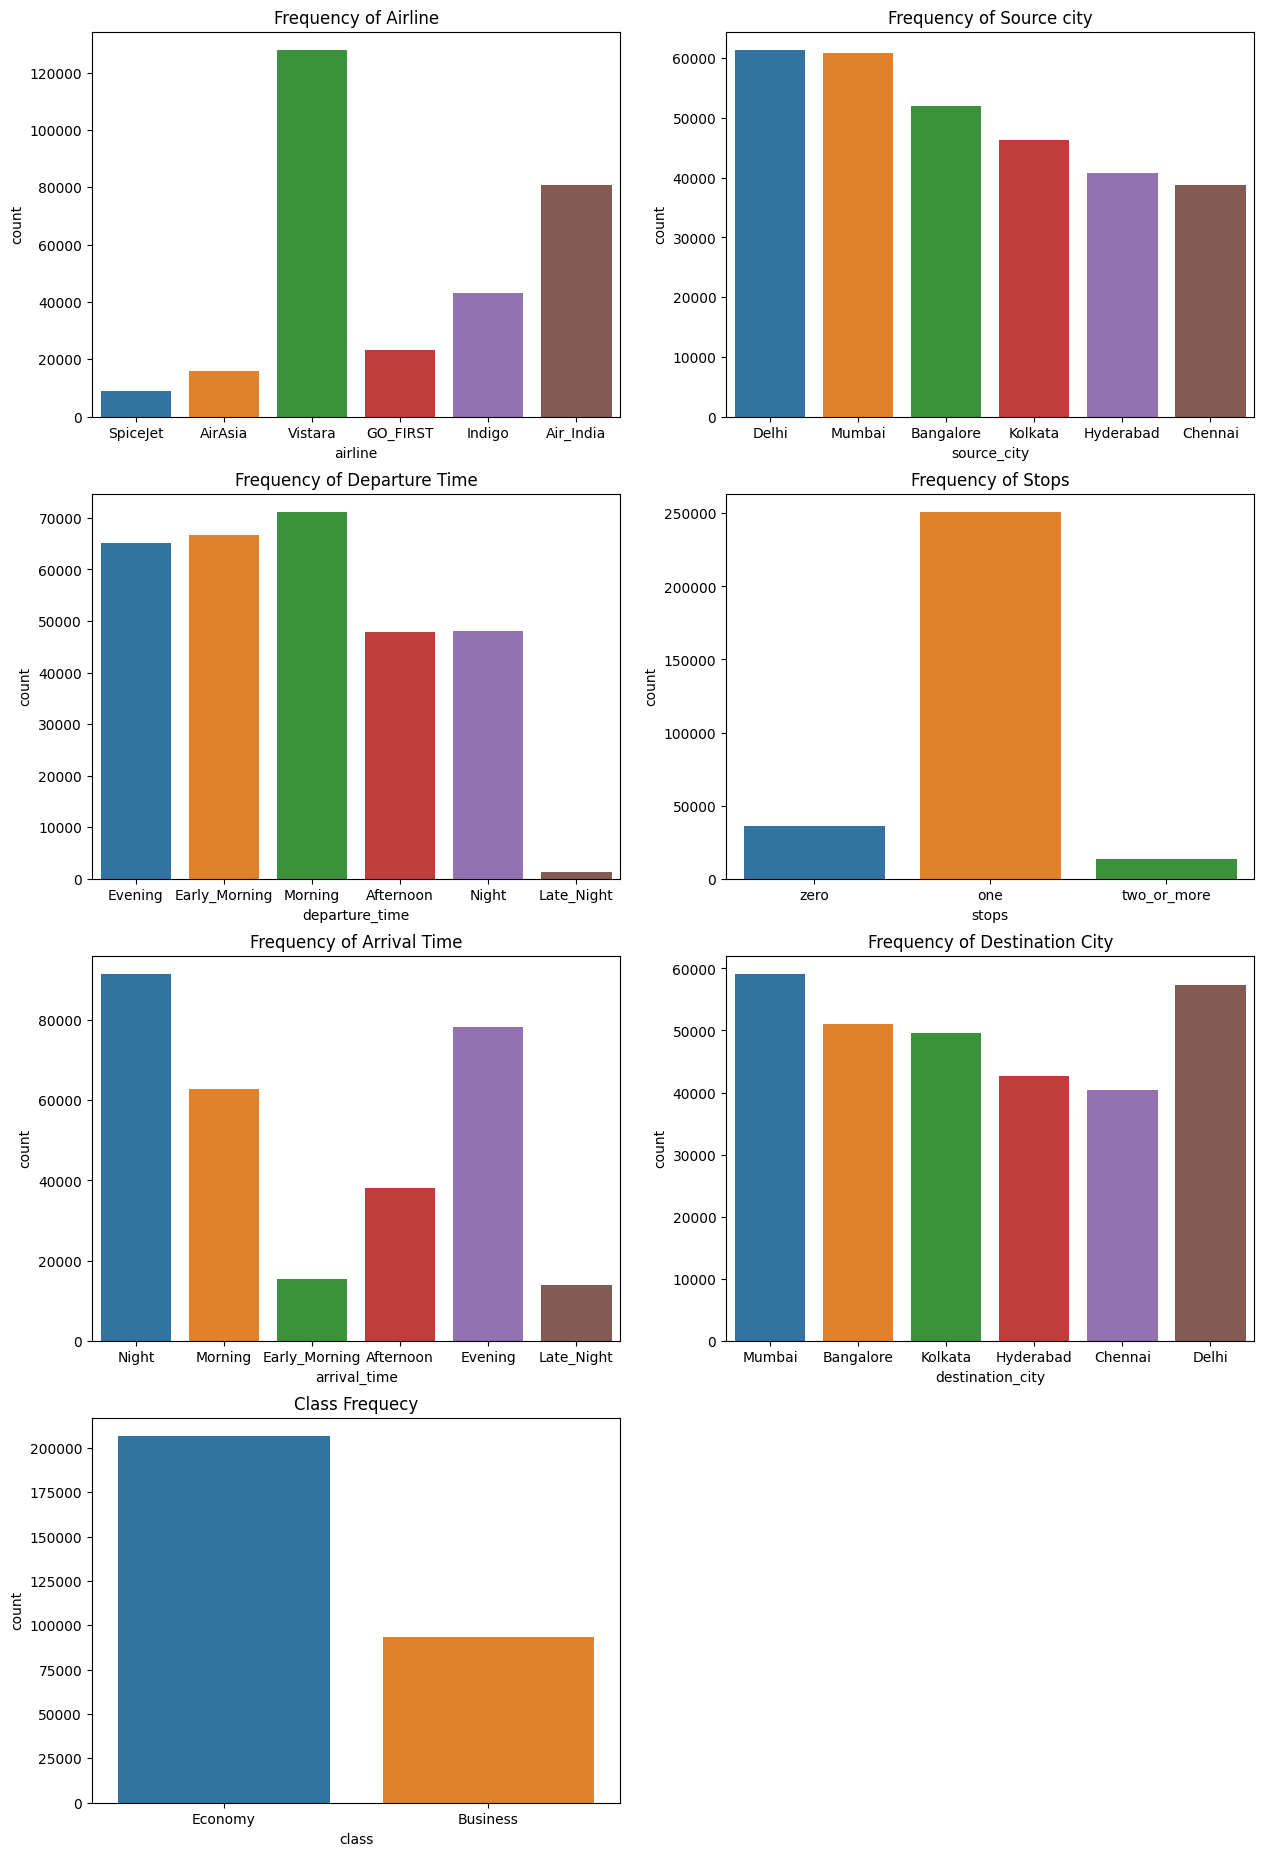

In [18]:
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of Source city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('Class Frequecy')

plt.show()

In [19]:
#performing labelencoding for categorical data except flight column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


<ipython-input-20-b572b1f86408>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


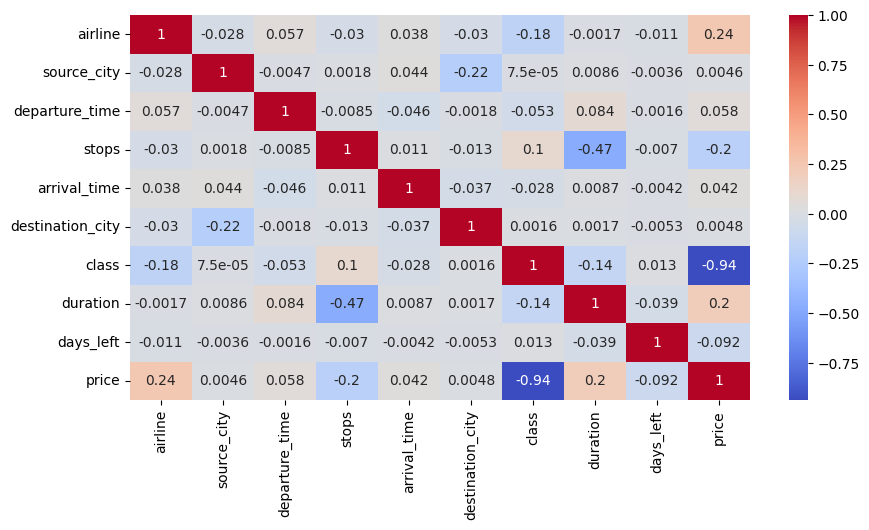

In [20]:
#plotting correlation graph
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [21]:
#to check multicollinearity using VIF(variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [22]:
df=df.drop(columns=['flight'])

In [23]:
#all values are less than 5 so there is no need to drop any column

In [24]:
#applying standard scaler
X=df.drop(columns=["price"])
y=df["price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [25]:
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [26]:

#calculating r2 score, MAE,MAPE,MSE,RMSE
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#r2 score value close to 1 means the regression line is a good fit

0.904554350718816

In [27]:
from sklearn import metrics
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error


4624.994868016881

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

49200540.293722

In [29]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

7014.309680483319

<ipython-input-30-5fae96ad37ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
<ipython-input-30-5fae96ad37ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


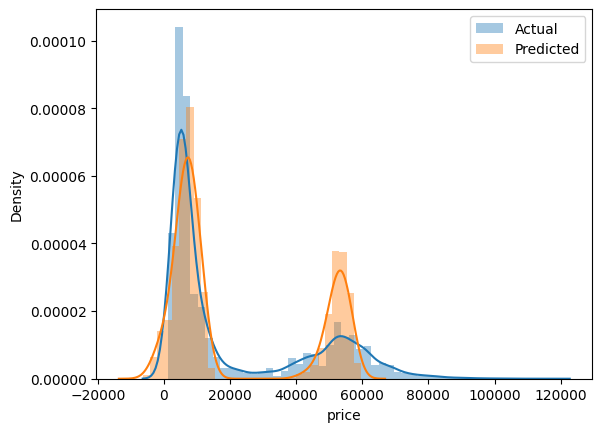

In [30]:
#to visualise the predicted and actual values
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()


In [31]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [32]:
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.9754276008719305

In [33]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1178.0595025903283

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

12666636.169579051

In [35]:
root_mean_sq_error=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

3559.021799536925

In [36]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=rfr.predict(x_test)
r2_score(y_test,y_pred)

0.9849375718217527

In [39]:
mean_abs_error=metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

1091.1074549032605

In [40]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
mean_sq_error

7764414.722790784

In [41]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
root_mean_sq_error

2786.4699393301885

<ipython-input-42-c0da3bcb0fc3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
<ipython-input-42-c0da3bcb0fc3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label="Predicted")


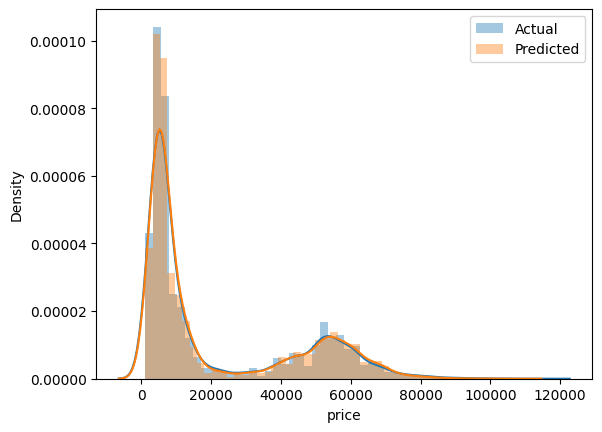

In [42]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred,label="Predicted")
plt.legend()

In [ ]:
#the r2 score for random forest regressor is the closest to 1 so Random forest regressor is the best model among the above tried models